# WeatherPy
----
#### Analyis
Observed Trends
1.  In the plots summarizing all cities in the data set, it appears that temperature tends to be the highest near the equator, which makes sense. Wind speed appears to be evenly distributed based on latitude which is interesting, I would have predicted there would be more wind in certain areas versus others.
2.  The correlation between temperature and latitude in the northern hemisphere is much stronger than in the southern, but this could be in part because the southern hemisphere has less data points in this sample set. There is still reasonable correlation in the southern hemisphere and it is opposite of northern which makes sense.
3.  There does not appear to be much correlation between latitude and % humidity, cloudiness or windspeed for either hemisphere, but the data is still fun to look at!


In [2]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# import API key
from api_keys import weather_api_key

# incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# view list of cities
cities

['umm lajj',
 'atuona',
 'busselton',
 'taolanaro',
 'half moon bay',
 'lincoln',
 'vuktyl',
 'ilulissat',
 'eravur',
 'hilo',
 'oksfjord',
 'yumen',
 'albany',
 'isangel',
 'fano',
 'kavieng',
 'ushuaia',
 'sao filipe',
 'batagay-alyta',
 'kahului',
 'parvatsar',
 'cape town',
 'yellowknife',
 'lorengau',
 'otane',
 'panji',
 'abilene',
 'margate',
 'grants',
 'harlingen',
 'grandview',
 'xining',
 'proletarsk',
 'vila franca do campo',
 'mataura',
 'punta arenas',
 'micheweni',
 'metro',
 'port alfred',
 'hobart',
 'kamen-na-obi',
 'jamestown',
 'georgetown',
 'marsh harbour',
 'mar del plata',
 'bluff',
 'sola',
 'pathein',
 'nemuro',
 'oranjestad',
 'nikolskoye',
 'puerto ayora',
 'pinega',
 'hofn',
 'rikitea',
 'sur',
 'lazaro cardenas',
 'port elizabeth',
 'yirol',
 'qaqortoq',
 'illoqqortoormiut',
 'mys shmidta',
 'erdenet',
 'esperance',
 'aden',
 'chifeng',
 'bredasdorp',
 'atbasar',
 'upernavik',
 'gat',
 'saint george',
 'attawapiskat',
 'goderich',
 'saskylakh',
 'acarau',


In [6]:
# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_updated = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# loop through the list of cities and perform a request for data on each, numbering each city
print(f"Beginning Data Retrieval")
print("-------------------------")
for num, city in enumerate(cities, start=1):
    response = requests.get(query_url + city).json()
    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']["humidity"])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        # updated city list to omit keys that are not found/have no data
        cities_updated.append(city)
        # print each city with log
        print(f"Processing {num}, City: {city}")
    
    except KeyError:
        print("City not found, skipping")
print("-------------------------")    
print(f"Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing 1, City: umm lajj
Processing 2, City: atuona
Processing 3, City: busselton
City not found, skipping
Processing 5, City: half moon bay
Processing 6, City: lincoln
Processing 7, City: vuktyl
Processing 8, City: ilulissat
Processing 9, City: eravur
Processing 10, City: hilo
Processing 11, City: oksfjord
Processing 12, City: yumen
Processing 13, City: albany
Processing 14, City: isangel
Processing 15, City: fano
Processing 16, City: kavieng
Processing 17, City: ushuaia
Processing 18, City: sao filipe
Processing 19, City: batagay-alyta
Processing 20, City: kahului
Processing 21, City: parvatsar
Processing 22, City: cape town
Processing 23, City: yellowknife
Processing 24, City: lorengau
Processing 25, City: otane
Processing 26, City: panji
Processing 27, City: abilene
Processing 28, City: margate
Processing 29, City: grants
Processing 30, City: harlingen
Processing 31, City: grandview
Processing 32, City: xining
Processing 33, Ci

Processing 271, City: yar-sale
City not found, skipping
Processing 273, City: clyde river
Processing 274, City: bengkulu
Processing 275, City: byron bay
Processing 276, City: kentau
Processing 277, City: krasnoselkup
Processing 278, City: namibe
Processing 279, City: pergamino
Processing 280, City: yerbogachen
Processing 281, City: cayenne
Processing 282, City: medicine hat
Processing 283, City: butaritari
Processing 284, City: manggar
Processing 285, City: ca mau
Processing 286, City: abu samrah
Processing 287, City: banjar
Processing 288, City: bosaso
Processing 289, City: the valley
City not found, skipping
Processing 291, City: saint-joseph
Processing 292, City: balkanabat
Processing 293, City: nichinan
Processing 294, City: luderitz
Processing 295, City: kidal
Processing 296, City: huilong
Processing 297, City: nantucket
Processing 298, City: vinh
Processing 299, City: kodiak
Processing 300, City: tuatapere
Processing 301, City: pacific grove
Processing 302, City: te anau
Processi

City not found, skipping
Processing 538, City: surt
Processing 539, City: sinnamary
Processing 540, City: macusani
Processing 541, City: yarmouth
Processing 542, City: mazyr
Processing 543, City: roma
Processing 544, City: solano
Processing 545, City: pandan
Processing 546, City: pocos de caldas
Processing 547, City: mitsamiouli
Processing 548, City: kuningan
Processing 549, City: mandalgovi
Processing 550, City: araguari
Processing 551, City: bayevo
Processing 552, City: damaturu
Processing 553, City: inhambane
Processing 554, City: sakakah
City not found, skipping
Processing 556, City: makakilo city
Processing 557, City: moron
Processing 558, City: ballina
Processing 559, City: hanmer springs
Processing 560, City: hoa binh
Processing 561, City: avera
Processing 562, City: talnakh
City not found, skipping
Processing 564, City: sonoita
Processing 565, City: ridgecrest
Processing 566, City: bagotville
Processing 567, City: careiro da varzea
Processing 568, City: mandiana
Processing 569,

In [31]:
# confirm lists are all same length for data frame
print(len(cities_updated),
len(latitude),
len(longitude),
len(temperature),
len(humidity),
len(cloudiness),
len(wind_speed))

563 563 563 563 563 563 563


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# define dictionary with lists created in loop above
weather_dict = {
    "City": cities_updated,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temperature,
    "% Humidity": humidity,
    "% Cloudiness": cloudiness,
    "Wind Speed (mph)": wind_speed
}

# save dictionary in data frame and show first five rows
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Latitude,Longitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
0,umm lajj,25.0213,37.2685,75.40,61,0,6.44
1,atuona,-9.8000,-139.0333,79.03,78,29,13.44
2,busselton,-33.6500,115.3333,69.33,53,0,10.65
3,half moon bay,37.4636,-122.4286,49.50,62,0,28.77
4,lincoln,40.8000,-96.6670,55.67,43,2,3.00


In [11]:
# define output file (csv)
output_data_file = "../output_data/cities.csv"

# saving the dataframe to csv
weather_df.to_csv(output_data_file)

In [12]:
# view stats on data frame
weather_df.describe()

,Latitude,Longitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,20.250947,20.599055,58.748384,69.536412,55.097691,8.477229
std,32.971875,91.368346,22.215631,21.993772,40.173238,6.449725
min,-54.800000,-179.166700,-9.170000,1.000000,0.000000,0.000000
25%,-6.128400,-56.856200,42.780000,60.000000,12.000000,3.510000
50%,24.144700,23.271700,64.130000,74.000000,57.000000,6.910000
75%,46.878100,104.055950,77.515000,86.000000,100.000000,11.540000
max,78.218600,179.316700,96.780000,100.000000,100.000000,58.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
# max humidity is 100% so skipping this step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

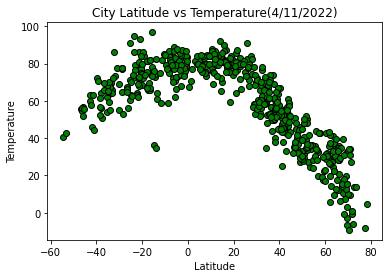

In [18]:
# create a Scatter Plot for latitude vs temp
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs Temperature(4/11/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvstemp.png")
plt.show()

## Latitude vs. Humidity Plot

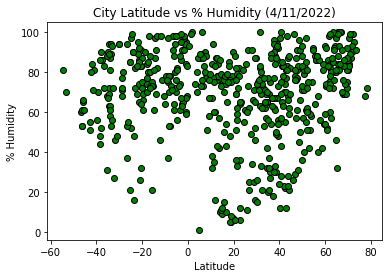

In [19]:
# create a Scatter Plot for latitude vs % humidity
x_values = weather_df['Latitude']
y_values = weather_df['% Humidity']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("City Latitude vs % Humidity (4/11/2022)")

# show plot and save to output file
plt.savefig("../output_data/north_latvshum.png")
plt.show()

## Latitude vs. Cloudiness Plot

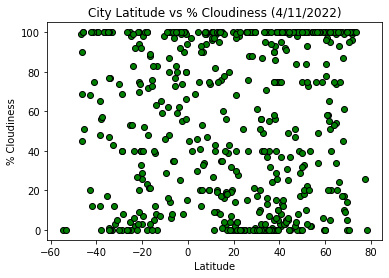

In [20]:
# create a Scatter Plot for latitude vs % cloudiness
x_values = weather_df['Latitude']
y_values = weather_df['% Cloudiness']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("City Latitude vs % Cloudiness (4/11/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvscloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

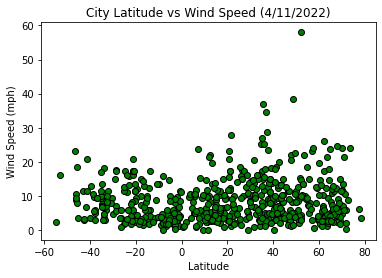

In [21]:
# create a Scatter Plot for latitude vs wind speed
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed (mph)']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (4/11/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvswind.png")
plt.show()

## Linear Regression

In [22]:
#oops, forgot dependecy for stats! here it is
from scipy import stats

# define data frames for north and south hemispheres
north_hem_df = weather_df[weather_df["Latitude"] >= 0]
south_hem_df = weather_df[weather_df["Latitude"] <0]
north_hem_df.head()

,City,Latitude,Longitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
0,umm lajj,25.0213,37.2685,75.40,61,0,6.44
3,half moon bay,37.4636,-122.4286,49.50,62,0,28.77
4,lincoln,40.8000,-96.6670,55.67,43,2,3.00
5,vuktyl,63.8567,57.3094,37.22,99,100,9.46
6,ilulissat,69.2167,-51.1000,19.63,83,100,2.64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8428344330062266


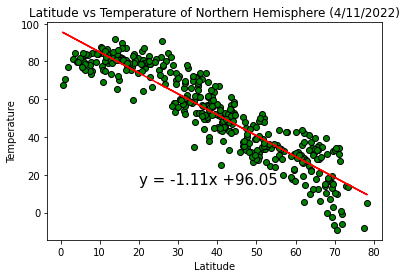

In [23]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Temperature']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature of Northern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(20,15),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvstemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3823797647615171


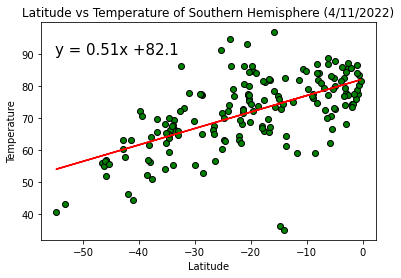

In [24]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Temperature']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature of Southern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(-55,90),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvstemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06417936717436404


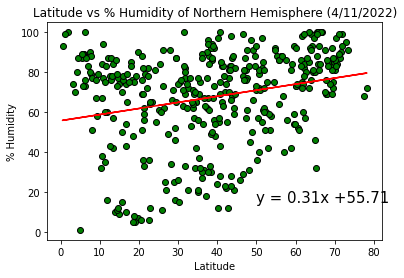

In [25]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Humidity']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Latitude vs % Humidity of Northern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(50,15),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvshum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05193718175532772


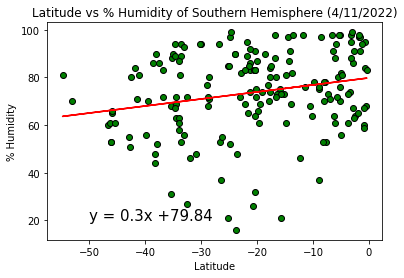

In [32]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Humidity']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Latitude vs % Humidity of Southern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvshum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04186926980683008


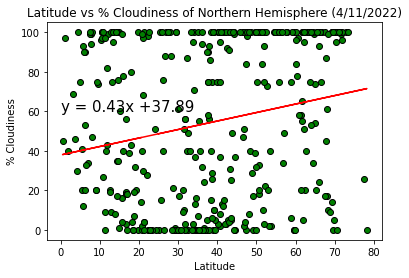

In [33]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Cloudiness']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Latitude vs % Cloudiness of Northern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(0,60),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvscloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04415318714277286


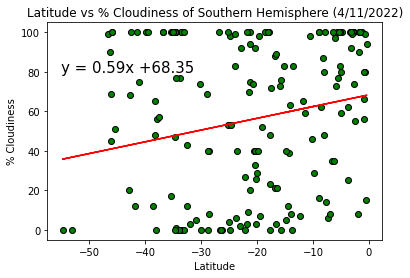

In [28]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Cloudiness']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Latitude vs % Cloudiness of Southern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(-55,80),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvscloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0024965147821785862


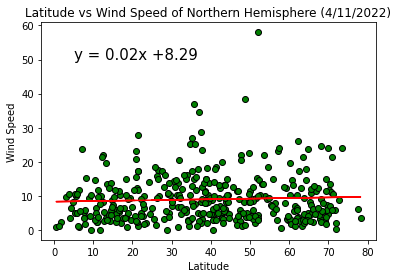

In [34]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind Speed (mph)']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed of Northern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(5,50),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvswind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09709531152028389


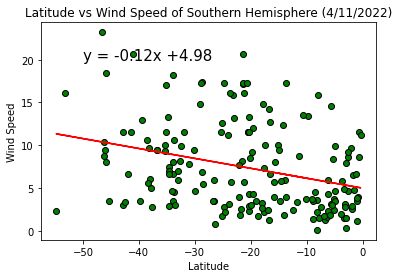

In [35]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind Speed (mph)']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed of Southern Hemisphere (4/11/2022)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvswind.png")
plt.show()